In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
path = r'T:\DCProjects\StoryMap\BikeCounting\BikeMap\MoreBikeData.gdb'
bikeracks = gpd.read_file(path, layer="Bike_Racks")

In [19]:
bikeracks.head()

,RackType,NoOfRacks,ColorStyle,Business,Address,geometry
0,Rack,5,Black Hoops,Taylor's bar & grill,894 E 13th Ave,POINT (4243270.870 877418.865)
1,Rack,4,Black Hoops,Us bank,810 E 13th Ave,POINT (4242944.109 877399.996)
2,Rack,3,Black Hoops,Starbucks,801 E 13th Ave,POINT (4242949.186 877522.085)
3,Rack,2,Black Hoops,Maple garden,1275 Alder St,POINT (4242949.314 877578.754)
4,Rack,3,Black Hoops,The lather shoppe,1233 Alder St,POINT (4242955.084 877699.125)


In [8]:
bikeracks.fillna("",inplace=True)

In [9]:
bikeracks['Address'] = bikeracks.AddressNo + ' ' + bikeracks.Direction + ' ' + bikeracks.AddressName.str.capitalize() + ' ' + bikeracks.AddressType.str.capitalize()

In [12]:
bikeracks.Address.replace('\s+', ' ', regex=True, inplace=True)

In [13]:
bikeracks['Business'] = bikeracks.Business.str.capitalize()

In [15]:
bikeracks.rename(columns={'Color_Style': 'ColorStyle'}, inplace=True)

In [16]:
bikeracks.columns

Index(['RackType', 'NoOfRacks', 'ColorStyle', 'AddressNo', 'Direction',
       'AddressName', 'AddressType', 'Business', 'Source', 'Owner', 'geometry',
       'Address'],
      dtype='object')

In [18]:
bikeracks = bikeracks[['RackType', 'NoOfRacks', 'ColorStyle', 'Business', 'Address', 'geometry']]

In [20]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [21]:
bikeracks = bikeracks.to_crs(epsg=3857)

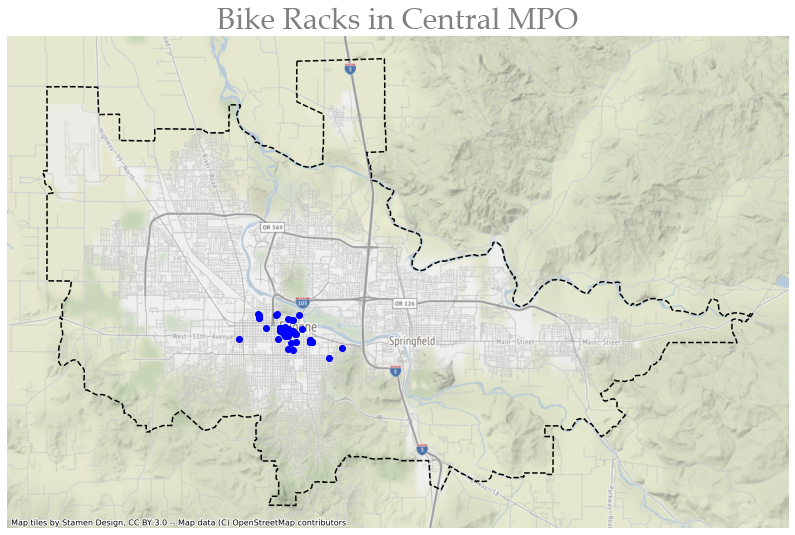

In [23]:
fig, ax = plt.subplots(figsize=(14, 12))
bikeracks.plot(ax=ax, color='blue', aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike Racks in Central MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [24]:
bikeracks.to_file(os.path.join(r"T:\DCProjects\StoryMap\BikeCounting\BikeMap", "bike_racks.shp"))